<a href="https://colab.research.google.com/github/unique-subedi/gene-expression/blob/main/Vinod_gene_expression_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime
import time
import math
import numpy as np
from numpy import linalg as LA
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyreadr
import pyreadr
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/gene-expression/main/data/brain.rda", "brain.rda")
brain = pyreadr.read_r("brain.rda")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 4.9 MB/s 


In [36]:
expression = pd.DataFrame(brain["expression"])
genes = pd.DataFrame(brain["genes"])
samples = pd.DataFrame(brain["samples"])

In [47]:
genes_Y_crom = genes[genes.chrom == "Y"].index
genes_bac_index = genes[genes.chrom.isnull()].index
mean_bac_exp = expression[genes_bac_index].mean(axis=1)
print(mean_bac_exp)
expression_norm =  expression - mean_bac_exp.values[:, None]

01_a_D_f_2.CEL    7.585395
01_a_I_f_2.CEL    9.586479
01_a_M_f_1.CEL    5.732075
01_c_D_f_1.CEL    6.696566
01_c_I_f_2.CEL    9.877747
                    ...   
10_c_I_f_2.CEL    9.566257
10_c_M_f_1.CEL    5.932850
10_d_D_f_2.CEL    6.902631
10_d_I_f_2.CEL    9.528189
10_d_M_f_2.CEL    6.350724
Length: 84, dtype: float64


A.C. cortex
41214_at                     1.050694
38355_at                     0.651265
32052_at                     0.613733
41158_at                     0.556277
AFFX-HSAC07/X00351_M_at      0.486122
38499_s_at                   0.458698
31525_s_at                   0.457847
AFFX-HUMGAPDH/M33197_5_at    0.446363
33117_r_at                   0.391064
31687_f_at                   0.382817
dtype: float64
['Y', 'Y', '11', 'X', '7', '3', '16hba1', '12', '6', '11']
Categories (39, object): ['1', '10', '10ak*', '10ptp*', ..., 'X', 'X Y', 'Y', 'na']

cerebellum
41214_at      1.164016
38355_at      0.934648
32052_at      0.711199
31687_f_at    0.689605
31525_s_at    0.660768
38285_at      0.574321
39864_at      0.562130
37714_at      0.527444
41158_at      0.522396
36567_at      0.515893
dtype: float64
['Y', 'Y', '11', '11', '16hba1', '16', '19', '3', 'X', '19']
Categories (39, object): ['1', '10', '10ak*', '10ptp*', ..., 'X', 'X Y', 'Y', 'na']

D.L.P.F. cortex
41214_at      1.336382
38355_at

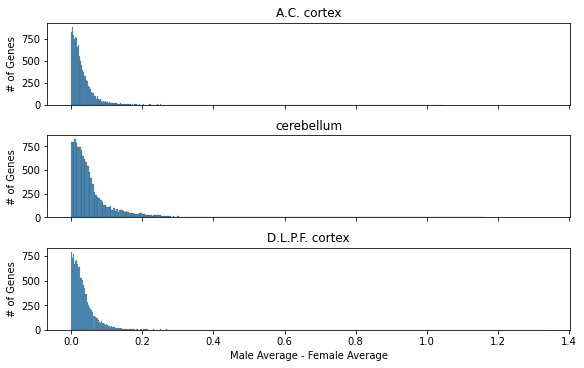

In [50]:
express_norm_samp = pd.concat([expression_norm, samples], axis=1)

express_norm_samp.head()
fig, axs = plt.subplots(3, 1, figsize=(8, 5), constrained_layout=True, sharex='all')
express_samp_loc = express_norm_samp
# print(express_samp_UM.head())
c = 0
for tissue in express_samp_loc["region"].unique():
  print(tissue)
  df_male = express_samp_loc[(express_samp_loc.region == tissue) & (express_samp_loc.sex == "male")]
  df_female = express_samp_loc[(express_samp_loc.region == tissue) & (express_samp_loc.sex == "female")]

  male_mean = expression_norm.loc[df_male.index].mean()
  female_mean = expression_norm.loc[df_female.index].mean()

  diff = np.abs(male_mean - female_mean)
  sns.histplot(diff, ax = axs[c])
  axs[c].set_title(tissue)
  axs[c].set_xlabel("Male Average - Female Average")
  axs[c].set_ylabel("# of Genes")
  diff = diff.sort_values(ascending=False)
  top_10 = diff.iloc[:10]
  print(top_10)
  op_genes = genes.loc[top_10.keys()].loc[:, 'chrom'].values
  print(op_genes)
  print("")
  c += 1





A.C. cortex
41158_at                     0.922574
AFFX-HSAC07/X00351_M_at      0.763263
41123_s_at                   0.727383
38499_s_at                   0.688549
AFFX-HSAC07/X00351_5_at      0.677616
36174_at                     0.640701
AFFX-HUMGAPDH/M33197_5_at    0.620171
32318_s_at                   0.611476
32538_at                     0.611107
35817_at                     0.600978
dtype: float64
['PLP1', 'ACTB', 'ENPP2', 'MOBP', 'ACTB', 'MARCKSL1', 'GAPDH', 'ACTB', 'TF', 'MBP']
Categories (8783, object): ['AADAC', 'AAK1', 'AAMP', 'AANAT', ..., 'ZYX', 'ZZEF1', 'ZZZ3', 'psiTPTE22']

cerebellum
32052_at      1.130487
31687_f_at    1.091789
41158_at      1.023626
31525_s_at    0.956235
40185_at      0.928880
34342_s_at    0.907448
32243_g_at    0.860283
32538_at      0.855866
35817_at      0.854619
41123_s_at    0.779115
dtype: float64
['HBB', 'HBB', 'PLP1', NaN, 'GFAP', 'SPP1', 'CRYAB', 'TF', 'MBP', 'ENPP2']
Categories (8783, object): ['AADAC', 'AAK1', 'AAMP', 'AANAT', ..., 'ZYX',

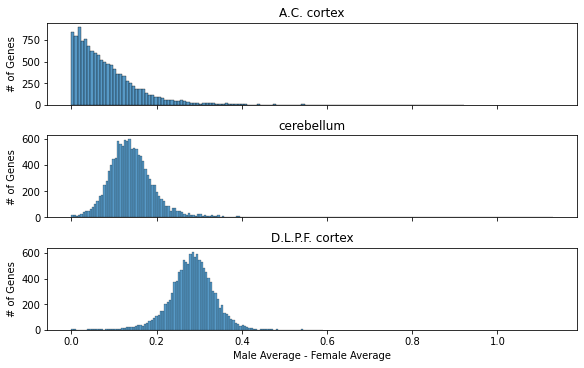

In [12]:
express_samp = pd.concat([expression, samples], axis=1)

express_samp.head()
fig, axs = plt.subplots(3, 1, figsize=(8, 5), constrained_layout=True, sharex='all')
express_samp_UM = express_samp[express_samp.lab == "Irvine"]
# print(express_samp_UM.head())
c = 0
for tissue in express_samp_UM["region"].unique():
  print(tissue)
  df_male = express_samp_UM[(express_samp_UM.region == tissue) & (express_samp_UM.sex == "male")]
  df_female = express_samp_UM[(express_samp_UM.region == tissue) & (express_samp_UM.sex == "female")]

  male_mean = expression.loc[df_male.index].mean().drop(genes_Y_crom)
  female_mean = expression.loc[df_female.index].mean().drop(genes_Y_crom)

  diff = np.abs(male_mean - female_mean)
  sns.histplot(diff, ax = axs[c])
  axs[c].set_title(tissue)
  axs[c].set_xlabel("Male Average - Female Average")
  axs[c].set_ylabel("# of Genes")
  diff = diff.sort_values(ascending=False)
  top_10 = diff.iloc[:10]
  print(top_10)
  op_genes = genes.loc[top_10.keys()].loc[:, 'sym'].values
  print(op_genes)
  print("")
  c += 1
